In [18]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.txt to data.txt


In [3]:
file_path = '/content/data.txt'

In [4]:
edges = pd.read_csv(file_path, sep=" ", header=None, names=["node1", "node2"], skiprows=1)

In [5]:
edges.head()

,node1,node2
0,2,1
1,4,2
2,9,2
3,9,3
4,13,4


In [6]:
# Create a graph from the edge list
G = nx.Graph()
G.add_edges_from(edges.values)

In [12]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
degree_centrality_df

,Node,Degree Centrality
0,2,0.000023
1,1,0.000008
2,4,0.000023
3,9,0.000023
4,3,0.000008
...,...,...
129159,129156,0.000015
129160,129161,0.000015
129161,129164,0.000008
129162,129162,0.000015


In [9]:
# Approximate Betweenness Centrality
betweenness_centrality_approx = nx.betweenness_centrality(G, k=100, seed=42)

In [11]:
betweenness_centrality_df = pd.DataFrame(list(betweenness_centrality_approx.items()), columns=['Node', 'Betweenness Centrality'])
betweenness_centrality_df

,Node,Betweenness Centrality
0,2,0.000000e+00
1,1,0.000000e+00
2,4,0.000000e+00
3,9,0.000000e+00
4,3,0.000000e+00
...,...,...
129159,129156,2.795736e-05
129160,129161,3.096910e-07
129161,129164,0.000000e+00
129162,129162,1.548455e-07


In [13]:
# Average Degree
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print("Average Degree:", average_degree)

Average Degree: 2.5616270787525934


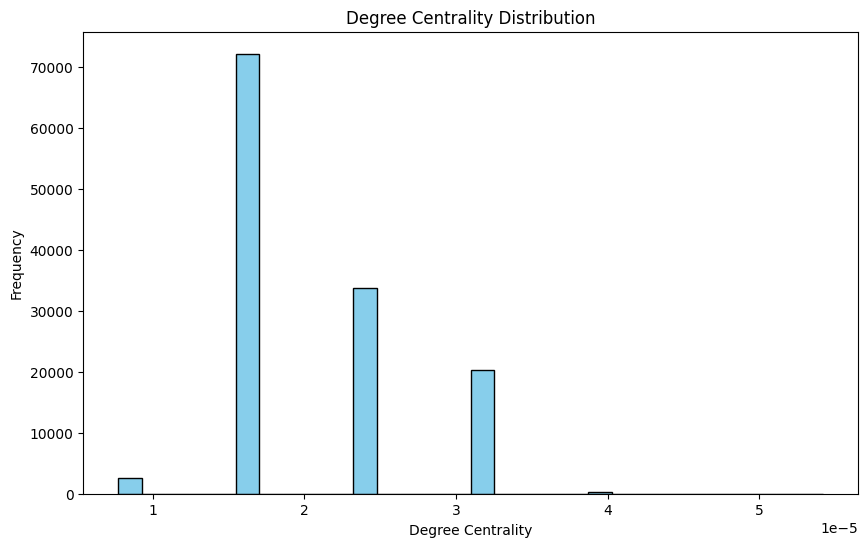

In [24]:
# Convert centralities to lists for plotting
degree_values = list(degree_centrality.values())
betweenness_values = list(betweenness_centrality_approx.values())

# Create a separate plot for Degree Centrality
plt.figure(figsize=(10, 6))
plt.hist(degree_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()


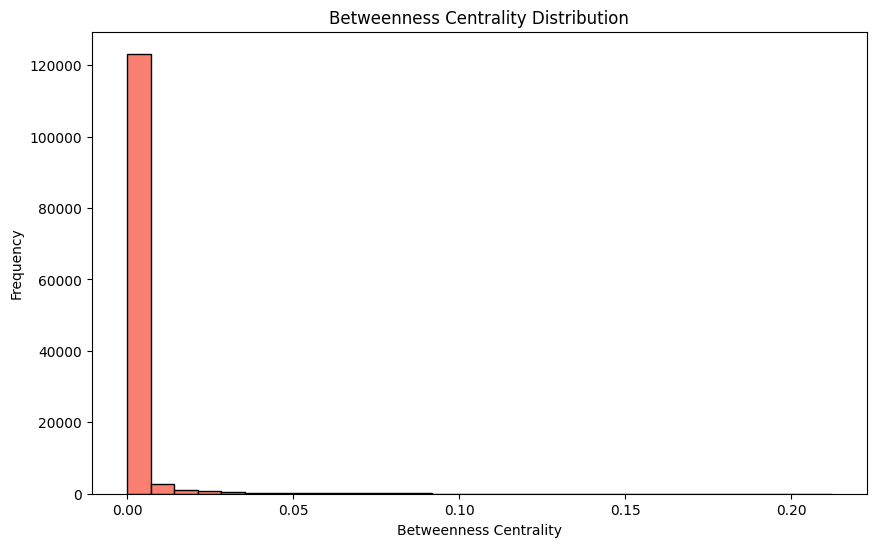

In [25]:

# Create a separate plot for Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.hist(betweenness_values, bins=30, color='salmon', edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()

**Log-Log Plot**

Degree distributions in real-world networks, such as road networks, often follow a power-law distribution, which can be visualized using a log-log plot

Rank refers to the position of a node when all nodes are sorted by their centrality values (either degree or betweenness centrality) in descending order.

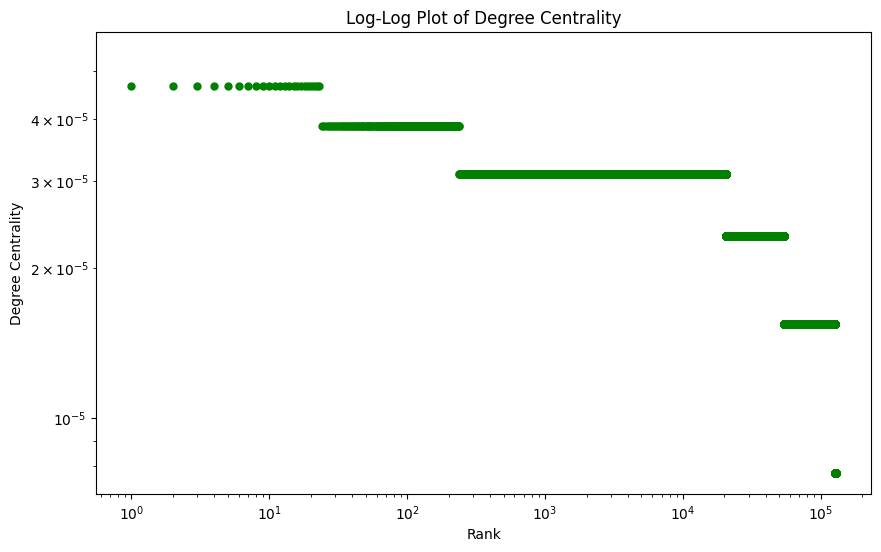

In [30]:
import numpy as np

# Sort degree centrality values in descending order
degree_sorted = sorted(degree_values, reverse=True)

# Log-Log Plot for Degree Centrality
plt.figure(figsize=(10, 6))
plt.loglog(degree_sorted, marker='o', color='green', markersize=5, linestyle='None')
plt.title('Log-Log Plot of Degree Centrality')
plt.xlabel('Rank')
plt.ylabel('Degree Centrality')
plt.show()

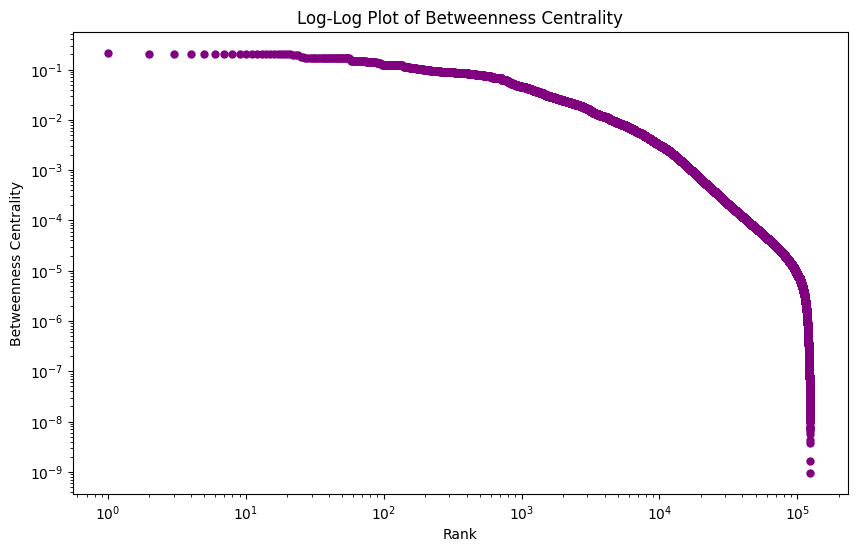

In [31]:
# Log-Log Plot for Betweenness Centrality
betweenness_sorted = sorted(betweenness_values, reverse=True)
plt.figure(figsize=(10, 6))
plt.loglog(betweenness_sorted, marker='o', color='purple', markersize=5, linestyle='None')
plt.title('Log-Log Plot of Betweenness Centrality')
plt.xlabel('Rank')
plt.ylabel('Betweenness Centrality')
plt.show()

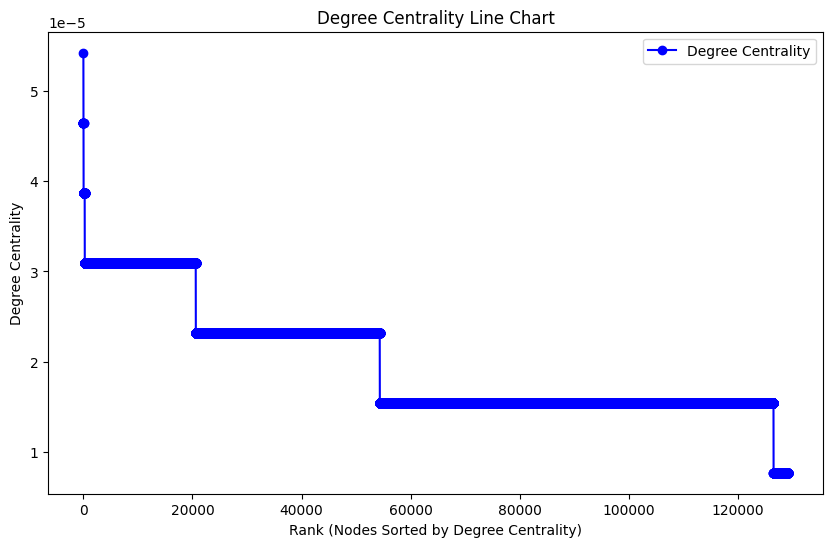

In [38]:
# Line Chart for Degree Centrality
plt.figure(figsize=(10, 6))
plt.plot(degree_sorted, color='blue', marker='o', linestyle='-', label="Degree Centrality")
plt.title('Degree Centrality Line Chart')
plt.xlabel('Rank (Nodes Sorted by Degree Centrality)')
plt.ylabel('Degree Centrality')
plt.grid(False)
plt.legend()
plt.show()

A small number of nodes (intersections) have relatively high connectivity (degree centrality), connecting to many other nodes.

A majority of the nodes have low degree centrality, meaning they are connected to only a few other nodes (which is typical in road networks where most intersections connect only to one or two other roads).

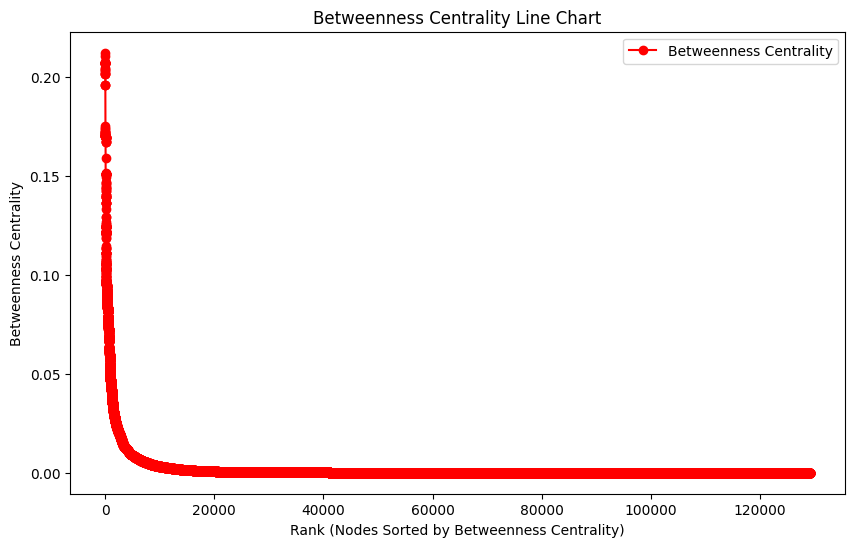

In [40]:
# Line Chart for Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.plot(betweenness_sorted, color='red', marker='o', linestyle='-', label="Betweenness Centrality")
plt.title('Betweenness Centrality Line Chart')
plt.xlabel('Rank (Nodes Sorted by Betweenness Centrality)')
plt.ylabel('Betweenness Centrality')
plt.grid(False)
plt.legend()
plt.show()